In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numba,math
from functools import *
import seaborn as sns
import pandas as pd

def expected_cherries(n):
    e = sum(i*p(n,i) for i in range(math.floor(n/2)+1))
    v = sum(i**2*p(n,i) for i in range(math.floor(n/2)+1)) - e**2
    return (e,v)

@cache
def p(n,k):
    if n<1 or k<1 or k>n/2: return 0
    if k==1:
        if n<4: return 1
        elif n==4: return 2./3
    if n==4 and k==2: return 1/3
    return (2*k) * p(n-1, k) / (n-1) + (n+1-2*k) * p(n-1, k-1) / (n-1)



In [88]:
ns=range(4, 500)
x = pd.DataFrame(dict(zip(['avg','v'],zip( *map(expected_cherries, ns)))),  index=ns).reset_index().rename(columns={'index':'n'})

0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
491    3.0
492    3.0
493    3.0
494    3.0
495    3.0
Length: 496, dtype: float64 0      18.0
1      22.5
2      22.5
3      22.5
4      22.5
       ... 
491    22.5
492    22.5
493    22.5
494    22.5
495    22.5
Length: 496, dtype: float64


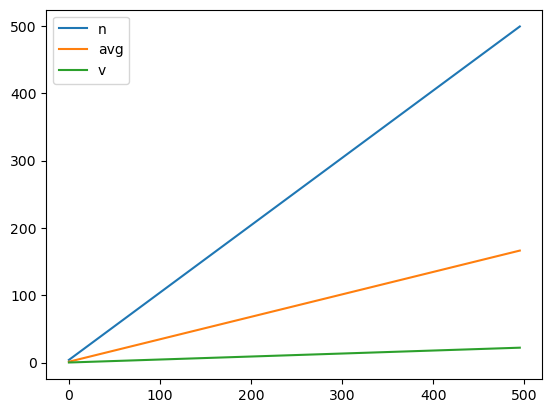

In [116]:
x.plot()
print(x.n/x.avg, x.n/x.v, )

$n=20,\mu=6.666666666666667, \sima^2=0.8888888888888857$
$n=50,\mu=16.666666666666668, \sima^2=2.222222222222115$
$n=100,\mu=33.33333333333335, \sima^2=4.4444444444432065$
$n=200,\mu=66.66666666666667, \sima^2=8.888888888889596$
$n=300,\mu=100.00000000000003, \sima^2=13.333333333330302$


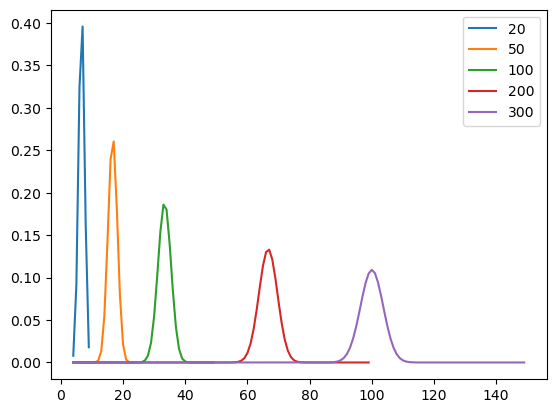

In [114]:
for n in (20, 50, 100, 200, 300):
    ks = range(4,n//2)
    ps = [p(n,k) for k in ks]
    plt.plot(ks,ps,label=n)
    e,v = expected_cherries(n)
    # plt.vlines(e,0,.3,colors='r')
    print(fr'$n={n},\mu={e}, \sima^2={v}$')
plt.legend()

In [98]:
1/0.044444

22.500225002250023